#FSI project:
## The Shopping Cart.

The goal of this project is to distinguish different items that can be bought in the supermarket. The dataset consists of 50 images of each class:

- Brick of gazpacho.
- Can of olives.
- Chocolate bar.
- Coke.
- Potato chips.
- Tuna.
- Yogurt.


First the available data will be loaded and the GPU will be used for processing.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
tf.test.gpu_device_name()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


''

In [ ]:
# Alba
!ls "/content/drive/My Drive/Proyecto - FSI/Dataset/"
path = "/content/drive/My Drive/Proyecto - FSI/Dataset/"

'Brick de gazpacho'  'Lata de aceitunas'  'Lata de refresco'   Yogur
 Chocolatina	     'Lata de atún'	  'Paquete de papas'


In [27]:
# Ámbar
!ls "/content/drive/My Drive/Universidad/ULPGC/Ciencia de datos/FSI/Proyecto - FSI/Dataset/"
path = "/content/drive/My Drive/Universidad/ULPGC/Ciencia de datos/FSI/Proyecto - FSI/Dataset/"

Joined	model_87.h5  test  train


In [28]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model

def plot_train_val(history):
    plt.rcParams['figure.figsize'] = [15, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    
    ax1.plot(history.history['loss'], label='Loss (train)')
    ax1.plot(history.history['val_loss'], label='Loss (val)')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc="upper right")
    ax2.plot(history.history['accuracy'], label='Accuracy (train)')
    ax2.plot(history.history['val_accuracy'], label='Accuracy (val)')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc="lower right")
    ax1.grid()
    ax2.grid()
    plt.plot()

(-0.5, 3023.5, 3309.5, -0.5)

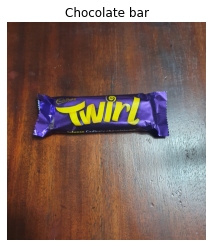

In [29]:
# SHOW DATA
%matplotlib inline
pil_im = Image.open(path + 'Joined/Chocolate bar/20211125_163927.jpg', 'r')
plt.imshow(np.asarray(pil_im))
plt.title("Chocolate bar")
plt.axis('off')

In [30]:
# DATA SOURCE --------------------------------------------------
image_size = (150, 150)
batch_size = 5

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path + "Joined",
    validation_split=0.2,
    labels='inferred',
    subset="training",
    seed=87,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path + "Joined",
    validation_split=0.2,
    labels='inferred',
    subset="validation",
    seed=87,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 350 files belonging to 7 classes.
Using 280 files for training.
Found 350 files belonging to 7 classes.
Using 70 files for validation.


The convolutional neural network model is built and trained with 80% of the data and then validated with the remaining 20%.

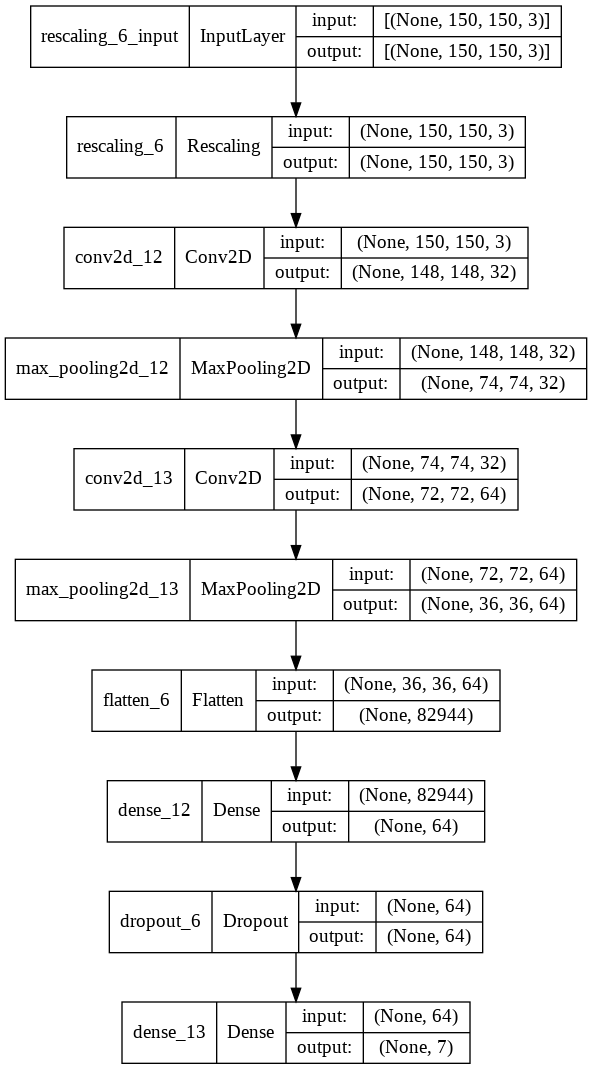

In [56]:
# MODEL --------------------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
    model = Sequential()
    model.add(Rescaling(scale=(1./127.5), offset=-1, input_shape=(image_size[0], image_size[1], 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    return model

model = create_model()
plot_model(create_model(), show_layer_names=True, show_shapes=True)


In [57]:
# TRAINING --------------------------------------------------
epochs = 200

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    epochs=epochs, 
    validation_data=val_ds,
    callbacks = [es]
)

Epoch 1/200
56/56 [==============================] - 26s 418ms/step - loss: 2.0990 - accuracy: 0.2250 - val_loss: 1.5302 - val_accuracy: 0.4143
Epoch 2/200
56/56 [==============================] - 25s 415ms/step - loss: 1.1864 - accuracy: 0.5607 - val_loss: 0.9236 - val_accuracy: 0.6143
Epoch 3/200
56/56 [==============================] - 25s 417ms/step - loss: 0.7823 - accuracy: 0.6786 - val_loss: 0.7022 - val_accuracy: 0.7000
Epoch 4/200
56/56 [==============================] - 25s 412ms/step - loss: 0.6025 - accuracy: 0.7964 - val_loss: 0.6494 - val_accuracy: 0.7000
Epoch 5/200
56/56 [==============================] - 25s 414ms/step - loss: 0.4903 - accuracy: 0.8250 - val_loss: 0.5626 - val_accuracy: 0.7571
Epoch 6/200
56/56 [==============================] - 25s 414ms/step - loss: 0.4795 - accuracy: 0.8179 - val_loss: 0.6343 - val_accuracy: 0.7571
Epoch 7/200
56/56 [==============================] - 25s 415ms/step - loss: 0.3460 - accuracy: 0.8679 - val_loss: 0.6592 - val_accuracy:

### Evaluating results

The accuracy obtained is acceptable but 90% accuracy is not achieved.

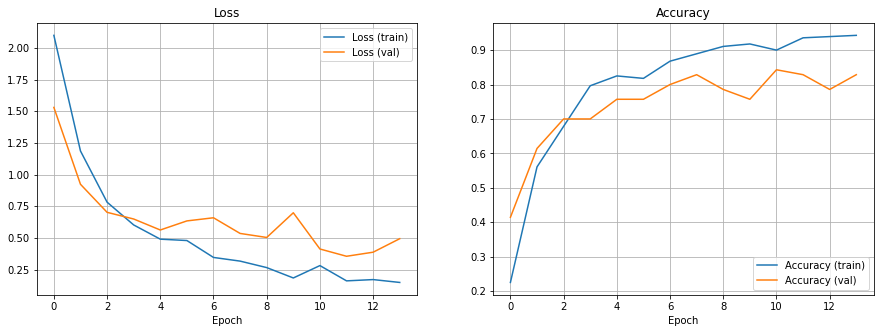

In [58]:
plot_train_val(history)

In [59]:
# Classification report
results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

print(classification_report(labels, predictions, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.6471    0.7857        17
           1     0.8889    0.8889    0.8889         9
           2     0.6000    1.0000    0.7500         6
           3     1.0000    0.9000    0.9474        10
           4     0.5833    1.0000    0.7368         7
           5     0.8889    1.0000    0.9412         8
           6     1.0000    0.7692    0.8696        13

    accuracy                         0.8429        70
   macro avg     0.8516    0.8865    0.8457        70
weighted avg     0.8971    0.8429    0.8475        70



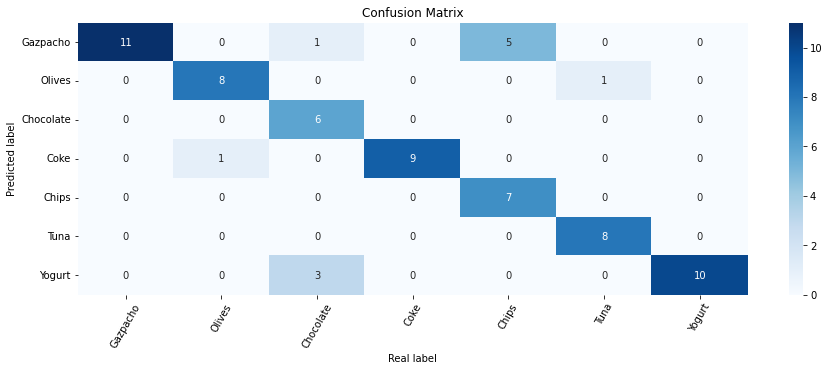

In [60]:
# Confusion matrix
label_tag = ["Gazpacho", "Olives", "Chocolate", "Coke", "Chips", "Tuna", "Yogurt"]
cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
tick_marks = np.arange(len(label_tag))
plt.xticks(tick_marks+0.5, label_tag, rotation=60)
plt.yticks(tick_marks+0.5, label_tag, rotation='horizontal')
plt.title("Confusion Matrix")
plt.ylabel('Predicted label')
plt.xlabel('Real label')
plt.show()

The two most commonly confused products are the brick of gazpacho and the bag of chips, probably because both products are red in colour. The model also confuses in some cases the yogurt with the chocolate bar both with a similar colour as well.

There are several improvements that can be made to the training to achieve better performance. One of the critical elements to get good results is to have a large dataset. Unfortunately, this is difficult or expensive in many cases. However, we can artificially enlarge the dataset by using the technique of data augmentation.

#### **Data augmentation**

The same neural network has been trained with a dataset augmented with transformations. The dataset has been augmented by inverting, enlarging, rotating and shifting the range of the dimensions of the available images to obtain new ones.


In [47]:
# DATA SOURCE --------------------------------------------------
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
	rotation_range=30,
	horizontal_flip=True,
  width_shift_range=0.2, 
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2)

# DATA AUGMENTATION ---------------------------------------
train_generator = img_gen.flow_from_directory(
    path + 'train',
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = img_gen.flow_from_directory(
    path + 'test',
    target_size=(image_size[0], image_size[1]),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 280 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [48]:
# TRAINING --------------------------------------------------
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()

    model_cnn.compile(loss='categorical_crossentropy', 
        optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
    
    history_aug = model_cnn.fit(
        train_generator,
        steps_per_epoch = 213//batch_size,
        validation_data = validation_generator,
        validation_steps = 33//batch_size,
        epochs = 20,
        batch_size = batch_size*3,
        verbose = 1
    )

Epoch 1/20
42/42 [==============================] - 47s 1s/step - loss: 2.1643 - accuracy: 0.2429 - val_loss: 1.6394 - val_accuracy: 0.4667
Epoch 2/20
42/42 [==============================] - 45s 1s/step - loss: 1.3603 - accuracy: 0.4524 - val_loss: 0.9496 - val_accuracy: 0.6000
Epoch 3/20
42/42 [==============================] - 47s 1s/step - loss: 1.1827 - accuracy: 0.5238 - val_loss: 1.0492 - val_accuracy: 0.5333
Epoch 4/20
42/42 [==============================] - 45s 1s/step - loss: 0.9456 - accuracy: 0.5952 - val_loss: 1.0247 - val_accuracy: 0.6000
Epoch 5/20
42/42 [==============================] - 45s 1s/step - loss: 0.8426 - accuracy: 0.6524 - val_loss: 0.7813 - val_accuracy: 0.6333
Epoch 6/20
42/42 [==============================] - 46s 1s/step - loss: 0.9385 - accuracy: 0.6381 - val_loss: 0.6067 - val_accuracy: 0.7667
Epoch 7/20
42/42 [==============================] - 46s 1s/step - loss: 0.7931 - accuracy: 0.6762 - val_loss: 0.6596 - val_accuracy: 0.7333
Epoch 8/20
42/42 [==

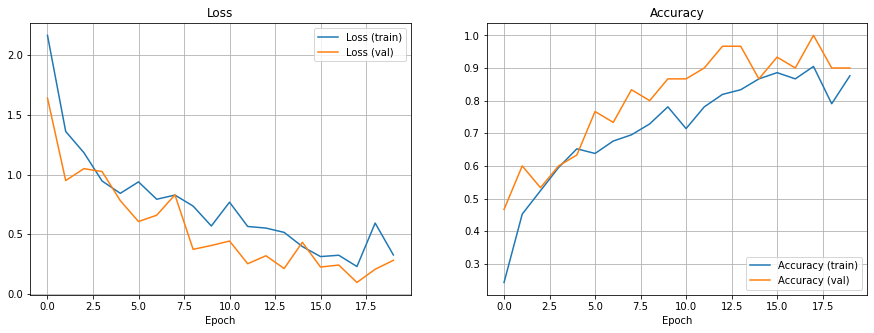

In [49]:
plot_train_val(history_aug)

As the dataset is increased, there is a clear improvement in accuracy, exceeding 90%. However, it is possible to go a step further and use transfer learning. 

## **Transfer Learning**

Transfer learning is a widely used method for building neural network models that usually gives good results when there are not many training samples. It involves using the convolutional layers of a previously trained network with a large number of images, freezing their weights (or features) and connecting a final fully connected part that performs the classification task of the particular dataset. The only weights that are modified during the training phase will be those of the fully connected part.



In [39]:
# TRANSFER MODEL --------------------------------------------------
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(image_size[0], image_size[1], 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = tf.keras.Input(shape=(image_size[0], image_size[1], 3))

# Make sure that the base_model is running in inference mode by passing training=False.
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Convert features of shape base_model.output_shape[1:] to vectors
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [40]:
# TRAINING --------------------------------------------------
epochs = 3

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=3, restore_best_weights=True)

history_transf = model.fit(
    train_ds,
    epochs=epochs, 
    validation_data=val_ds,
    callbacks = [es]
)

Epoch 1/3
56/56 [==============================] - 84s 1s/step - loss: 3.2802 - accuracy: 0.5571 - val_loss: 1.1246 - val_accuracy: 0.6857
Epoch 2/3
56/56 [==============================] - 83s 1s/step - loss: 0.2428 - accuracy: 0.9071 - val_loss: 0.7338 - val_accuracy: 0.7857
Epoch 3/3
56/56 [==============================] - 83s 1s/step - loss: 0.0255 - accuracy: 0.9929 - val_loss: 0.6142 - val_accuracy: 0.8000


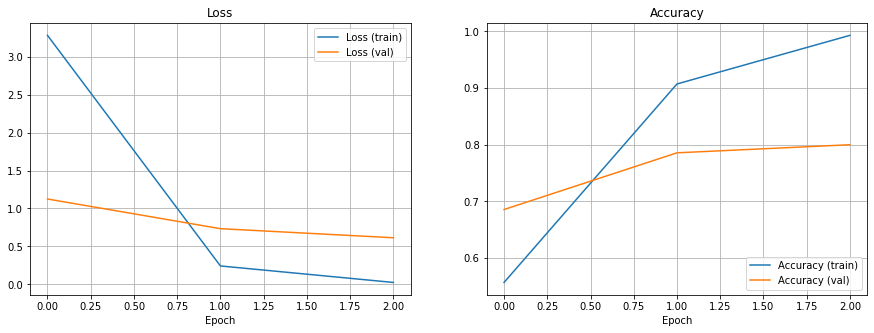

In [41]:
plot_train_val(history_transf)

The neural network learns so fast that overfitting occurs very easily.